# Data Collecting

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Electric Vehicle Sales by State in India (1).csv")
df.head() # First 5 rows of the dataset

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


In [4]:
df.tail() # last 5 rows of the dataset

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023,dec,12-01-2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96841,2023,dec,12-01-2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96842,2023,dec,12-01-2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0
96843,2023,dec,12-01-2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0
96844,2023,dec,12-01-2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0


In [6]:
df.shape

(96845, 8)

In [7]:
df.columns.nunique() # unique columns are present in total 

8

In [8]:
df.columns #column names are as below

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [11]:
df.Year.value_counts() # so the data contains information 2014 to present

2019    10315
2023    10279
2018    10225
2022    10021
2017     9799
2016     9348
2021     9249
2015     9052
2014     9022
2020     8675
2024      860
Name: Year, dtype: int64

In [13]:
df.State.value_counts() # almost every state and UT are present in the data

Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chandigarh

In [15]:
df.Vehicle_Class.value_counts() # below are the class af vehicle being sold in the Indian market

MOTOR CAR                                      4111
M-CYCLE/SCOOTER                                4101
GOODS CARRIER                                  4096
MOTOR CAB                                      3985
BUS                                            3813
THREE WHEELER (PASSENGER)                      3786
MAXI CAB                                       3684
MOPED                                          3399
AMBULANCE                                      3393
THREE WHEELER (GOODS)                          3208
AGRICULTURAL TRACTOR                           3186
CONSTRUCTION EQUIPMENT VEHICLE                 2864
CRANE MOUNTED VEHICLE                          2437
TRACTOR (COMMERCIAL)                           2325
ADAPTED VEHICLE                                2310
M-CYCLE/SCOOTER-WITH SIDE CAR                  2275
EARTH MOVING EQUIPMENT                         2181
EDUCATIONAL INSTITUTION BUS                    2093
E-RICKSHAW(P)                                  1951
EXCAVATOR (N

In [16]:
df.Vehicle_Category.value_counts() # below are the category af vehicle being sold in the Indian market

Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: Vehicle_Category, dtype: int64

In [17]:
df.Vehicle_Type.value_counts() # below are the types af vehicle being sold in the Indian market

Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: Vehicle_Type, dtype: int64

In [21]:
df.drop(columns=['Year']).describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


# Data Preprocessing

In [23]:
# Chicking for Duplicates and missing Values
check_duplicates=df.duplicated().sum()
print(check_duplicates)

0


In [24]:
check_missing=df.isnull().sum()
print(check_missing)

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [25]:
# Checking if the Datatypes are correct or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
Year                 96845 non-null int64
Month_Name           96845 non-null object
Date                 96845 non-null object
State                96845 non-null object
Vehicle_Class        96845 non-null object
Vehicle_Category     96845 non-null object
Vehicle_Type         96845 non-null object
EV_Sales_Quantity    96845 non-null int64
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [27]:
# The column Year is given as float, but we should convert it to int
df['Year']=df['Year'].astype(int)

In [37]:
# The column Data is given as Object, but we should convert it to Datatime
df['Date']=pd.to_datetime(df['Date'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
Year                 96845 non-null int32
Month_Name           96845 non-null object
Date                 96845 non-null datetime64[ns]
State                96845 non-null object
Vehicle_Class        96845 non-null object
Vehicle_Category     96845 non-null object
Vehicle_Type         96845 non-null object
EV_Sales_Quantity    96845 non-null int64
Data                 96845 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(5)
memory usage: 6.3+ MB


In [40]:
df['EV_Sales_Quantity']=df['EV_Sales_Quantity'].astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
Year                 96845 non-null int32
Month_Name           96845 non-null object
Date                 96845 non-null datetime64[ns]
State                96845 non-null object
Vehicle_Class        96845 non-null object
Vehicle_Category     96845 non-null object
Vehicle_Type         96845 non-null object
EV_Sales_Quantity    96845 non-null float64
Data                 96845 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 6.3+ MB


In [45]:
df.drop(columns=["Data"], inplace=True)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
Year                 96845 non-null int32
Month_Name           96845 non-null object
Date                 96845 non-null datetime64[ns]
State                96845 non-null object
Vehicle_Class        96845 non-null object
Vehicle_Category     96845 non-null object
Vehicle_Type         96845 non-null object
EV_Sales_Quantity    96845 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 5.5+ MB


# Exploratory Data Analysis(EDA)

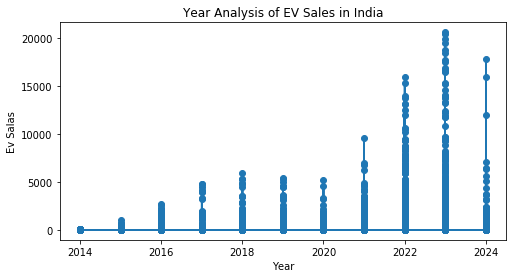

In [67]:
plt.figure(figsize=(8,4))
plt.title('Year Analysis of EV Sales in India')
plt.plot(df['Year'], df['EV_Sales_Quantity'], marker='o')
plt.xlabel("Year")
plt.ylabel('Ev Salas')
plt.show()

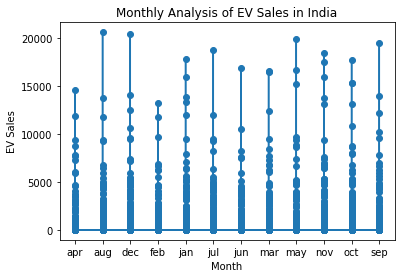

In [66]:
plt.figure(figsize=(6, 4))
plt.title('Monthly Analysis of EV Sales in India')
plt.plot(df['Month_Name'], df['EV_Sales_Quantity'], marker='o')
plt.xlabel("Month")
plt.ylabel("EV Sales")    
plt.show()

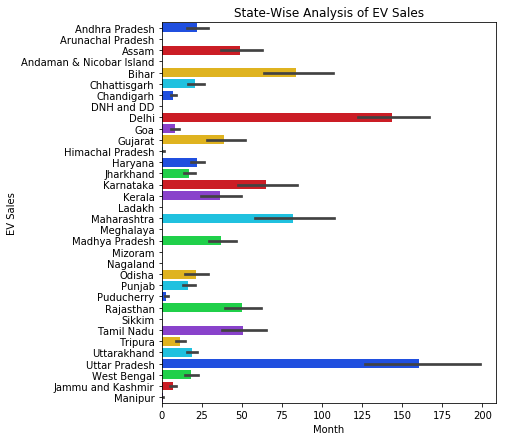

In [78]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State',x='EV_Sales_Quantity',data=df,palette='bright')
plt.xlabel("Month")
plt.ylabel("EV Sales")    
plt.show()

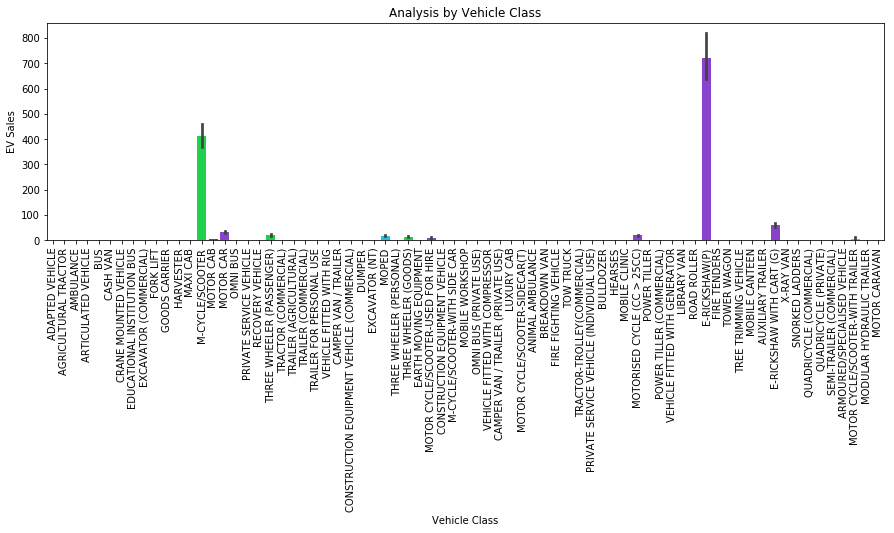

In [87]:
plt.figure(figsize=(15,4))
plt.title('Analysis by Vehicle Class')
sns.barplot(x='Vehicle_Class',y='EV_Sales_Quantity',data=df,palette='bright')
plt.xlabel("Vehicle Class")
plt.ylabel("EV Sales")
plt.xticks(rotation=90)
plt.show()

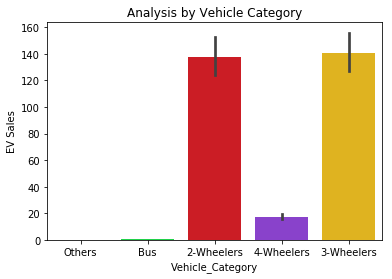

In [91]:
plt.figure(figsize=(6,4))
plt.title('Analysis by Vehicle Category')
sns.barplot(x='Vehicle_Category',y='EV_Sales_Quantity',data=df,palette='bright')
plt.xlabel("Vehicle_Category")
plt.ylabel("EV Sales")
plt.xticks(rotation=0)
plt.show()

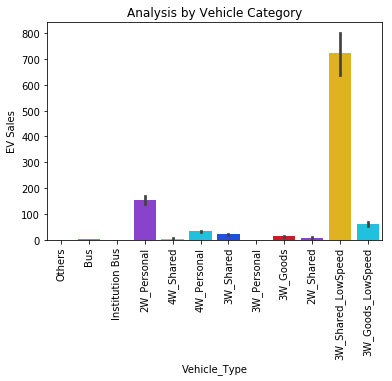

In [93]:
plt.figure(figsize=(6,4))
plt.title('Analysis by Vehicle Category')
sns.barplot(x='Vehicle_Type',y='EV_Sales_Quantity',data=df,palette='bright')
plt.xlabel("Vehicle_Type")
plt.ylabel("EV Sales")
plt.xticks(rotation=90)
plt.show()

# Conclusion

# Based on our analysis of electric vehicle (EV) sales data in India, several key insights emerged:

`Overall Growth in EV Sales:` The data indicates a steady increase in EV sales over the years, reflecting a growing adoption of electric mobility in India. Government incentives, rising fuel prices, and environmental awareness could be contributing factors.

`State-wise Trends:` Maharashtra, Karnataka, and Uttar Pradesh have the highest EV sales, suggesting that these states have better EV infrastructure, policies, or consumer interest.

`Vehicle Category Insights:`

`Two-wheelers dominate` the EV market, indicating their affordability and demand in urban and semi-urban areas.

`Four-wheelers and three-wheelers` are also gaining traction, particularly in the shared and commercial vehicle segments.

`Buses and institutional vehicles` show limited EV adoption, but they hold potential for public transport electrification.

`Monthly Sales Variations:` There are seasonal fluctuations in EV sales, possibly linked to festival seasons, new model launches, or policy changes.

`Data Quality and Limitations:` The dataset contained no missing values, and datatype inconsistencies were addressed during preprocessing. However, external factors such as charging infrastructure, policy interventions, and consumer behavior were not included in this analysis.